# Iris Flower Classification
* The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.


---


Dataset: [dataset.csv](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)


---






# Loading and Exploring the Dataset

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data Science/CodSoft (Internship)/iris_flower_classification/dataset.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
rows, cols = df.shape
print(f"rows={rows} and cols={cols}")

rows=150 and cols=5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.duplicated().sum()

3

# Data Visualization

## Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Pairplot for Different Species

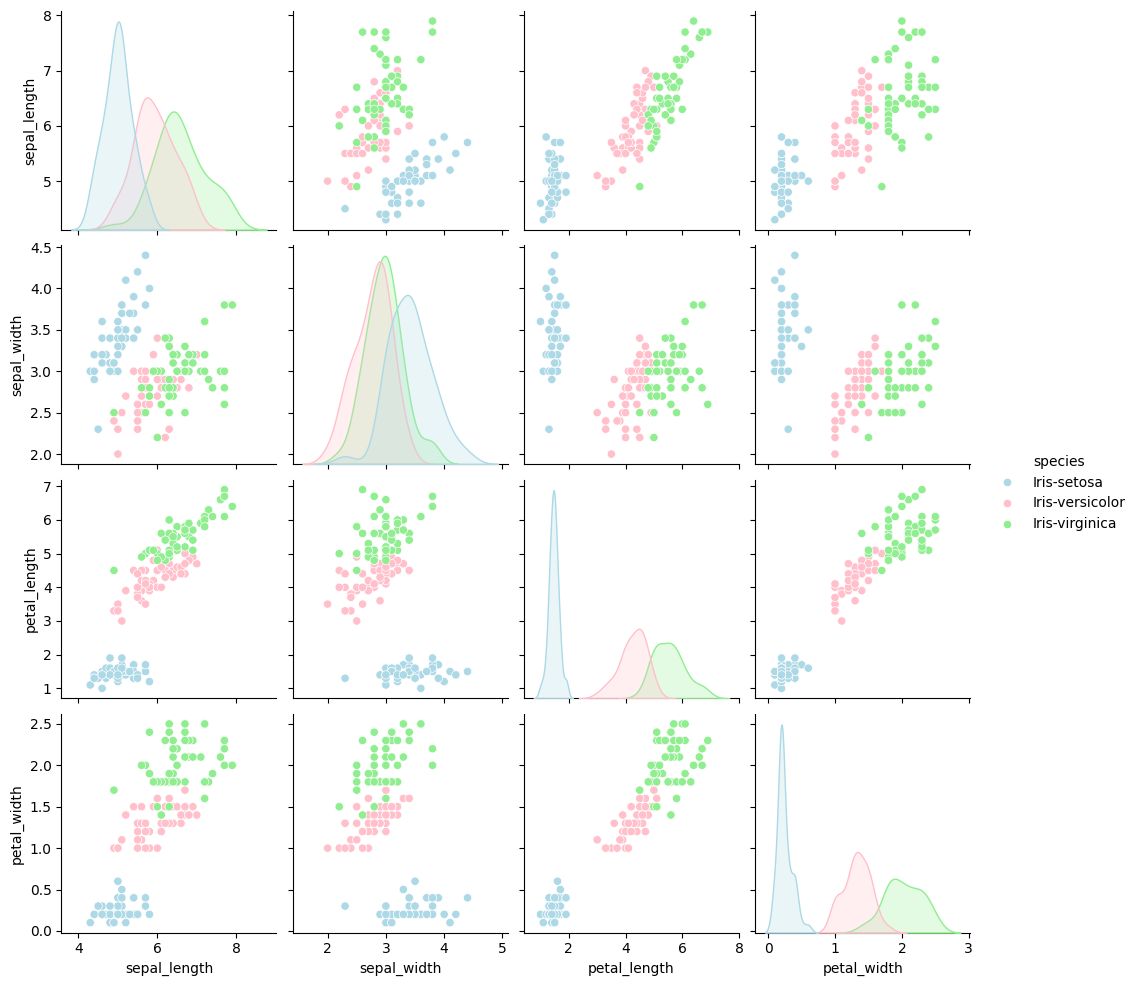

In [ ]:
custom_palette = {
    'Iris-setosa': 'lightblue',
    'Iris-versicolor': 'pink',
    'Iris-virginica': 'lightgreen'
}

sns.pairplot(df, hue='species', palette=custom_palette, diag_kind='kde')

plt.show()

## Boxplot of Features with Annotations

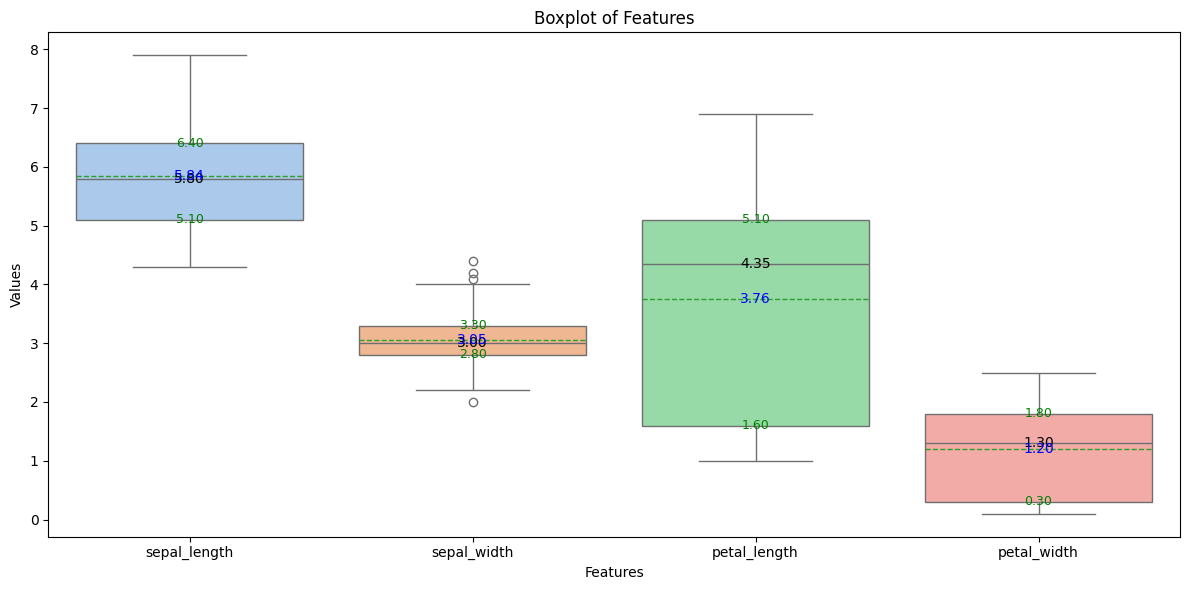

In [ ]:
plt.figure(figsize=(12, 6))

box = sns.boxplot(data=df, palette='pastel', showmeans=True, meanline=True)

for i, column in enumerate(df.columns[:-1]):
    stats = df[column].describe()
    plt.text(i, stats['50%'], f"{stats['50%']:.2f}", ha='center', va='center', fontsize=10, color='black')  # Median
    plt.text(i, stats['mean'], f"{stats['mean']:.2f}", ha='center', va='center', fontsize=10, color='blue')  # Mean
    plt.text(i, stats['25%'], f"{stats['25%']:.2f}", ha='center', va='center', fontsize=9, color='green')  # Q1
    plt.text(i, stats['75%'], f"{stats['75%']:.2f}", ha='center', va='center', fontsize=9, color='green')  # Q3

plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

## Distribution of Sepal Length

In [ ]:
fig = px.histogram(
    df,
    x='sepal_length',
    title="Distribution of Sepal Length",
    labels={'sepal_length': 'Sepal Length'},
    color_discrete_sequence=['lightblue']
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Sepal Length",
    yaxis_title="Frequency"
)

fig.show()

## Distribution of Sepal Width

In [ ]:
fig = px.histogram(
    df,
    x='sepal_width',
    title="Distribution of Sepal Width",
    labels={'sepal_width': 'Sepal Width'},
    color_discrete_sequence=['pink']
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Sepal Width",
    yaxis_title="Frequency"
)

fig.show()

## Distribution of Petal Length

In [ ]:
fig = px.histogram(
    df,
    x='petal_length',
    title="Distribution of Petal Length",
    labels={'petal_length': 'Petal Length'},
    color_discrete_sequence=['lightblue']
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Petal Length",
    yaxis_title="Frequency"
)

fig.show()

## Distribution of Petal Width

In [ ]:
fig = px.histogram(
    df,
    x='petal_width',
    title="Distribution of Petal Width",
    labels={'petal_width': 'Petal Width'},
    color_discrete_sequence=['pink']
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title="Petal Width",
    yaxis_title="Frequency"
)

fig.show()

# Data Encoding

## Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

## Data Transformation

In [ ]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])

## Exploring Dataset after Transformation

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Heatmap for Correlation

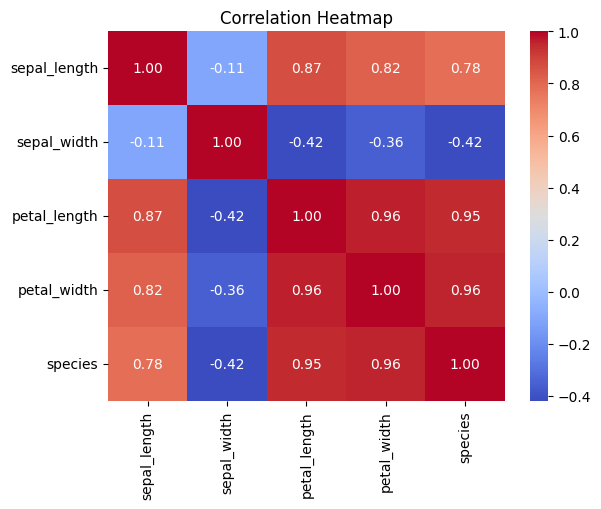

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Libraries

## K-Nearest Neighbors (KNN) Model

In [ ]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 100.00%
Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Classifier Model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 100.00%
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion Matrix

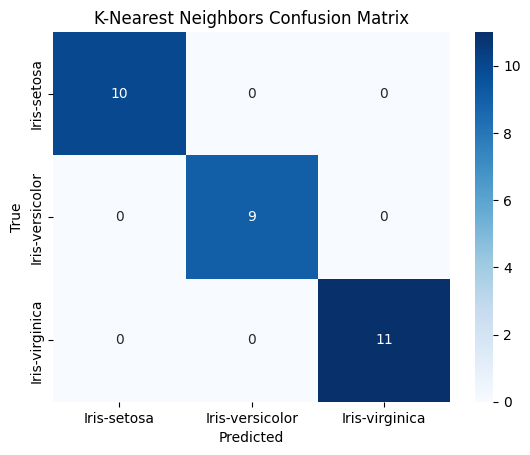

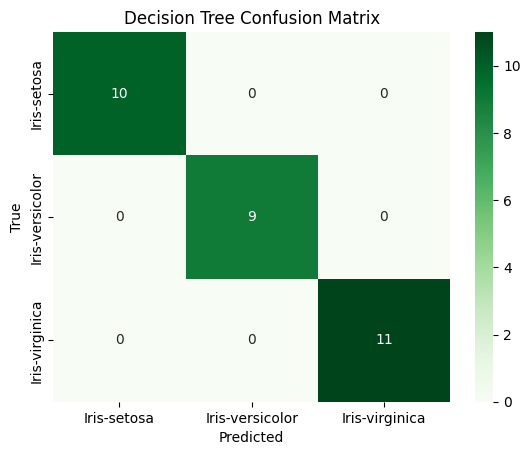

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Hyperparameter Tuning

In [ ]:
print("For KNN:")
k_values = [3, 5, 7, 9, 11]
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f"Accuracy for K={k}: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nFor Decision Tree:")
max_depth_values = [3, 5, 7, 10, 15]
for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print(f"Accuracy for Max Depth={max_depth}: {accuracy_score(y_test, y_pred) * 100:.2f}%")

For KNN:
Accuracy for K=3: 100.00%
Accuracy for K=5: 100.00%
Accuracy for K=7: 96.67%
Accuracy for K=9: 100.00%
Accuracy for K=11: 100.00%

For Decision Tree:
Accuracy for Max Depth=3: 100.00%
Accuracy for Max Depth=5: 100.00%
Accuracy for Max Depth=7: 100.00%
Accuracy for Max Depth=10: 100.00%
Accuracy for Max Depth=15: 100.00%


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

print("For KNN:")
knn_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"Cross-Validation Scores: {knn_scores}")
print(f"Average Accuracy: {knn_scores.mean() * 100:.2f}%")

print("\nFor Decision Tree:")
dt_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-Validation Scores: {dt_scores}")
print(f"Average Accuracy: {dt_scores.mean() * 100:.2f}%")

For KNN:
Cross-Validation Scores: [0.93333333 1.         1.         0.96666667 1.        ]
Average Accuracy: 98.00%

For Decision Tree:
Cross-Validation Scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Average Accuracy: 96.67%
